## Import Modules

In [1]:
import requests
import json
from io import StringIO
import os

# Install these!
import descartes
import geopandas

In [2]:
outdir = "../../docs/results/latest/geo"

# Create output directory if it doesn't exist
if not os.path.exists(outdir):
    os.mkdir(outdir)

## Import geoJSON datasets

Import the polygons to use as a back drop for the animation. 
1. Import the geoJSON
1. Save a local copy

In [5]:
url = "https://raw.githubusercontent.com/phylogeography/SpreaD3/master/data/geoJSON_maps/subregion/subregion_Western_Asia_subunits.json"
fetch_map = requests.get(url) ## fetch Central America geoJSON file from SpreaD3 repo as an example
json_map=json.load(StringIO(fetch_map.text)) ## import json

# Save to local file
out_path = os.path.join(outdir, "subregion_Western_Asia_subunits.geojson")
json.dump(json_map,open(out_path,'w')) ## write to file locally
df_places = geopandas.read_file(out_path)

In [ ]:
### Inspect the new dataframe

In [6]:
df_places

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,geometry
0,0,Admin-0 map subunit,4.0,United Arab Emirates,ARE,0.0,2.0,Sovereign country,United Arab Emirates,ARE,...,Asia,Asia,Western Asia,Middle East & North Africa,20.0,20.0,6.0,-99.0,1.0,"MULTIPOLYGON (((53.86305 24.23469, 53.88860 24..."
1,0,Admin-0 map subunit,6.0,Armenia,ARM,0.0,2.0,Sovereign country,Armenia,ARM,...,Asia,Asia,Western Asia,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,"MULTIPOLYGON (((45.54717 40.62155, 45.51369 40..."
2,0,Admin-0 map subunit,5.0,Azerbaijan,AZE,0.0,2.0,Sovereign country,Azerbaijan,AZE,...,Asia,Asia,Western Asia,Europe & Central Asia,10.0,10.0,4.0,-99.0,1.0,"MULTIPOLYGON (((45.07500 39.74982, 45.14126 39..."
3,5,Admin-0 map subunit,4.0,Bahrain,BHR,0.0,2.0,Sovereign country,Bahrain,BHR,...,Asia,Asia,Western Asia,Middle East & North Africa,7.0,7.0,5.0,2.0,1.0,"POLYGON ((50.55161 26.19424, 50.59474 26.16031..."
4,1,Admin-0 map subunit,9.0,Cyprus No Mans Area,CNM,0.0,2.0,Indeterminate,Cyprus No Mans Area,CNM,...,Asia,Asia,Western Asia,Europe & Central Asia,23.0,23.0,0.0,-99.0,1.0,"MULTIPOLYGON (((33.92540 35.06277, 33.94111 35..."
5,1,Admin-0 map subunit,6.0,Northern Cyprus,CYN,0.0,2.0,Sovereign country,Northern Cyprus,CYN,...,Asia,Asia,Western Asia,Europe & Central Asia,9.0,15.0,6.0,-99.0,1.0,"MULTIPOLYGON (((32.62620 35.16509, 32.61520 35..."
6,1,Admin-0 map subunit,5.0,Cyprus,CYP,0.0,2.0,Sovereign country,Cyprus,CYP,...,Asia,Asia,Western Asia,Europe & Central Asia,6.0,6.0,4.0,-99.0,1.0,"MULTIPOLYGON (((33.77399 34.98867, 33.77792 34..."
7,3,Admin-0 map subunit,3.0,United Kingdom,GB1,1.0,2.0,Dependency,Dhekelia Sovereign Base Area,ESB,...,Asia,Asia,Western Asia,Europe & Central Asia,8.0,8.0,5.0,3.0,-99.0,"POLYGON ((33.90587 35.09088, 33.91362 35.09088..."
8,0,Admin-0 map subunit,6.0,Israel,ISR,1.0,3.0,Geo unit,Palestine,PSX,...,Asia,Asia,Western Asia,Middle East & North Africa,4.0,4.0,4.0,-99.0,-99.0,"POLYGON ((34.24835 31.21145, 34.23040 31.25923..."
9,0,Admin-0 map subunit,7.0,Georgia,GEO,0.0,3.0,Geo unit,Georgia,GEO,...,Asia,Asia,Western Asia,Europe & Central Asia,6.0,6.0,6.0,-99.0,1.0,"POLYGON ((42.58665 41.57911, 42.58523 41.57876..."


<AxesSubplot:>

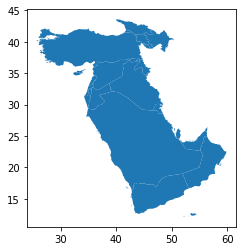

In [7]:
df_places.plot()

### Select specific countries

<AxesSubplot:>

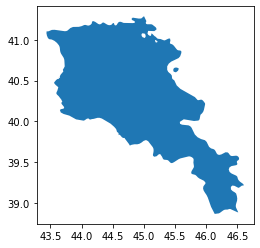

In [14]:
df_places[df_places["sovereignt"] == "Armenia"].plot()

<AxesSubplot:>

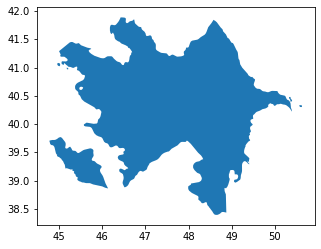

In [15]:
df_places[df_places["sovereignt"] == "Azerbaijan"].plot()

In [29]:
df_places[df_places["sovereignt"] == "Azerbaijan"]

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,geometry
2,0,Admin-0 map subunit,5.0,Azerbaijan,AZE,0.0,2.0,Sovereign country,Azerbaijan,AZE,...,Asia,Asia,Western Asia,Europe & Central Asia,10.0,10.0,4.0,-99.0,1.0,"MULTIPOLYGON (((45.07500 39.74982, 45.14126 39..."


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().